In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Input, layers

print(tf.__version__)



2.4.1


In [3]:
dataset = "cifar"
if dataset == "fashion_mnist":
  fashion_mnist = tf.keras.datasets.fashion_mnist
  (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
elif dataset == "mnist":
  mnist = tf.keras.datasets.mnist
  (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
  class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
elif dataset == "cifar":
  (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
  class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
  train_labels = train_labels.squeeze()
  test_labels = test_labels.squeeze()

input_shape = train_images.shape[1:]
train_images = train_images / 255.0
test_images = test_images / 255.0
print("Training Images range from {:2.5f} to {:2.5f}".format(np.min(train_images), np.max(train_images)))
print("Test     Images range from {:2.5f} to {:2.5f}".format(np.min(test_images), np.max(test_images)))

170500096/170498071 [==============================] - 35s 0us/step
Training Images range from 0.00000 to 1.00000
Test     Images range from 0.00000 to 1.00000


In [4]:
# https://keras.io/api/models/sequential/
model = tf.keras.Sequential([
  Input(shape=input_shape),
  layers.Conv2D(32, kernel_size=(3,3), strides = 2, activation="relu", padding='same'),
  layers.Conv2D(64, kernel_size=(3,3), strides = 2, activation="relu", padding='same'),
  layers.MaxPooling2D(pool_size=(2, 2), strides = 2 ),
  layers.Flatten(),
  layers.Dense(1024, activation='relu'),
  layers.Dense(10)
])
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 1,079,242
Trainable params: 1,079,242
Non-trainable params: 0
______________________________________________

In [5]:
train_hist = model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 11s 3ms/step - loss: 1.5874 - accuracy: 0.4254
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.0574 - accuracy: 0.6258
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8803 - accuracy: 0.6905
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7100 - accuracy: 0.7506
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5727 - accuracy: 0.8018
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4125 - accuracy: 0.8591
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2822 - accuracy: 0.9027
Epoch 8/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1879 - accuracy: 0.9382
Epoch 9/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1237 - accuracy: 0.9598
Epoch 10/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.10

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 4.5817 - accuracy: 0.6564


# Training Accuracy is 98.97% and Test Accuracy is 65.64%

In [9]:
from keras_preprocessing import image
from google.colab import drive
drive.mount('/content/drive')
import PIL
import PIL.Image
img_dir = "/content/drive/My Drive/Aircraft.jpg"


Mounted at /content/drive


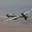

In [10]:
img = PIL.Image.open(img_dir)
img

<BarContainer object of 10 artists>

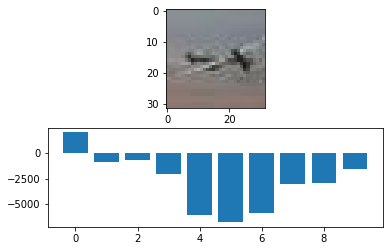

In [11]:
ex_img = np.array([image.img_to_array(img,dtype = np.uint8)])
ex_out = model.predict(ex_img)
plt.subplot(2,1,1)
plt.imshow(ex_img[0,:,:], cmap='Greys')

plt.subplot(2,1,2)
plt.bar(np.arange(10), ex_out[0])

# Classification 0 is "airplane" so the model correctly identified the picture

In [12]:
model = tf.keras.Sequential([
  Input(shape=input_shape),
  layers.DepthwiseConv2D(kernel_size=(3,3),strides=(2), activation="relu", padding='same'),
  layers.Conv2D(32, kernel_size=(1,1), activation="relu", padding='same'),
  layers.DepthwiseConv2D(kernel_size=(3,3),strides=(2), activation="relu", padding='same'),
  layers.Conv2D(64, kernel_size=(1,1), activation="relu", padding='same'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(1024, activation='relu'),
  layers.Dense(10)
])
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
depthwise_conv2d (DepthwiseC (None, 16, 16, 3)         30        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        128       
_________________________________________________________________
depthwise_conv2d_1 (Depthwis (None, 8, 8, 32)          320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          2112      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)             

In [14]:
train_hist = model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0976 - accuracy: 0.2128
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6650 - accuracy: 0.4018
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4768 - accuracy: 0.4703
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3228 - accuracy: 0.5262
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1986 - accuracy: 0.5716
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1161 - accuracy: 0.6023
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0274 - accuracy: 0.6395
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9496 - accuracy: 0.6649
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8723 - accuracy: 0.6932
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.801

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 4.4888 - accuracy: 0.5789


# Training Accuracy = 98.65%, Test Accuracy = 57.89%

<BarContainer object of 10 artists>

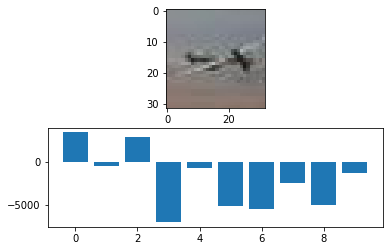

In [16]:
ex_img = np.array([image.img_to_array(img,dtype = np.uint8)])
ex_out = model.predict(ex_img)
plt.subplot(2,1,1)
plt.imshow(ex_img[0,:,:], cmap='Greys')

plt.subplot(2,1,2)
plt.bar(np.arange(10), ex_out[0])


#Model correctly identified picture but thinks it also may be a bird